In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy.stats import norm
import time
import warnings
warnings.simplefilter('ignore')


In [67]:
train=pd.read_csv('alistre_train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)
submission=pd.read_csv('sample_submission.csv',index_col=0)
print(train.shape, test.shape, submission.shape)

(188318, 131) (125546, 130) (125546, 1)


In [68]:
train.head(3)

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6  \
id                                                     ...             
1     A    B    A    B    A    A    A    A    B     A  ...  0.718367   
2     A    B    A    A    A    A    A    A    B     B  ...  0.438917   
5     A    B    A    A    B    A    A    A    B     B  ...  0.289648   

       cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
id                                                                      
1   0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
2   0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
5   0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   

      cont14     loss  
id                     
1   0.714843  2213.18  
2   0.304496  1283.60  
5   0.774425  3005.09  

[3 rows x 131 columns]

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 1 to 587633
Columns: 131 entries, cat1 to loss
dtypes: float64(15), object(116)
memory usage: 189.7+ MB


In [70]:
train.describe()

cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.336105       0.350175       0.312800   
50%         0.422268       0.440945       0.438285       0.441060   
75%         0.643315       0.655021       0.591045       0.623580   
max         0.983674       0.997162       1.000000       0.980200   

               cont9         cont10         cont11         cont12  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.485506       0.498066       0.493511       0.493150   
std         0.181660       0.185877       0.209737       0.209427   
min         0.000080       0.000000       0.035321       0.036232   
25%         0.358970       0.364580       0.310961       0.311661   
50%         0.441450       0.461190       0.457203       0.462286   
75%         0.566820       0.614590       0.678924       0.675759   
max         0.995400       0.994980       0.998742       0.998484   

              cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  
mean        0.493138       0.495717    3037.337686  
std         0.212777       0.222488    2904.086186  
min         0.000228       0.179722       0.670000  
25%         0.315758       0.294610    1204.460000  
50%         0.363547       0.407403    2115.570000  
75%         0.689974       0.724623    3864.045000  
max         0.988494       0.844848  121012.250000

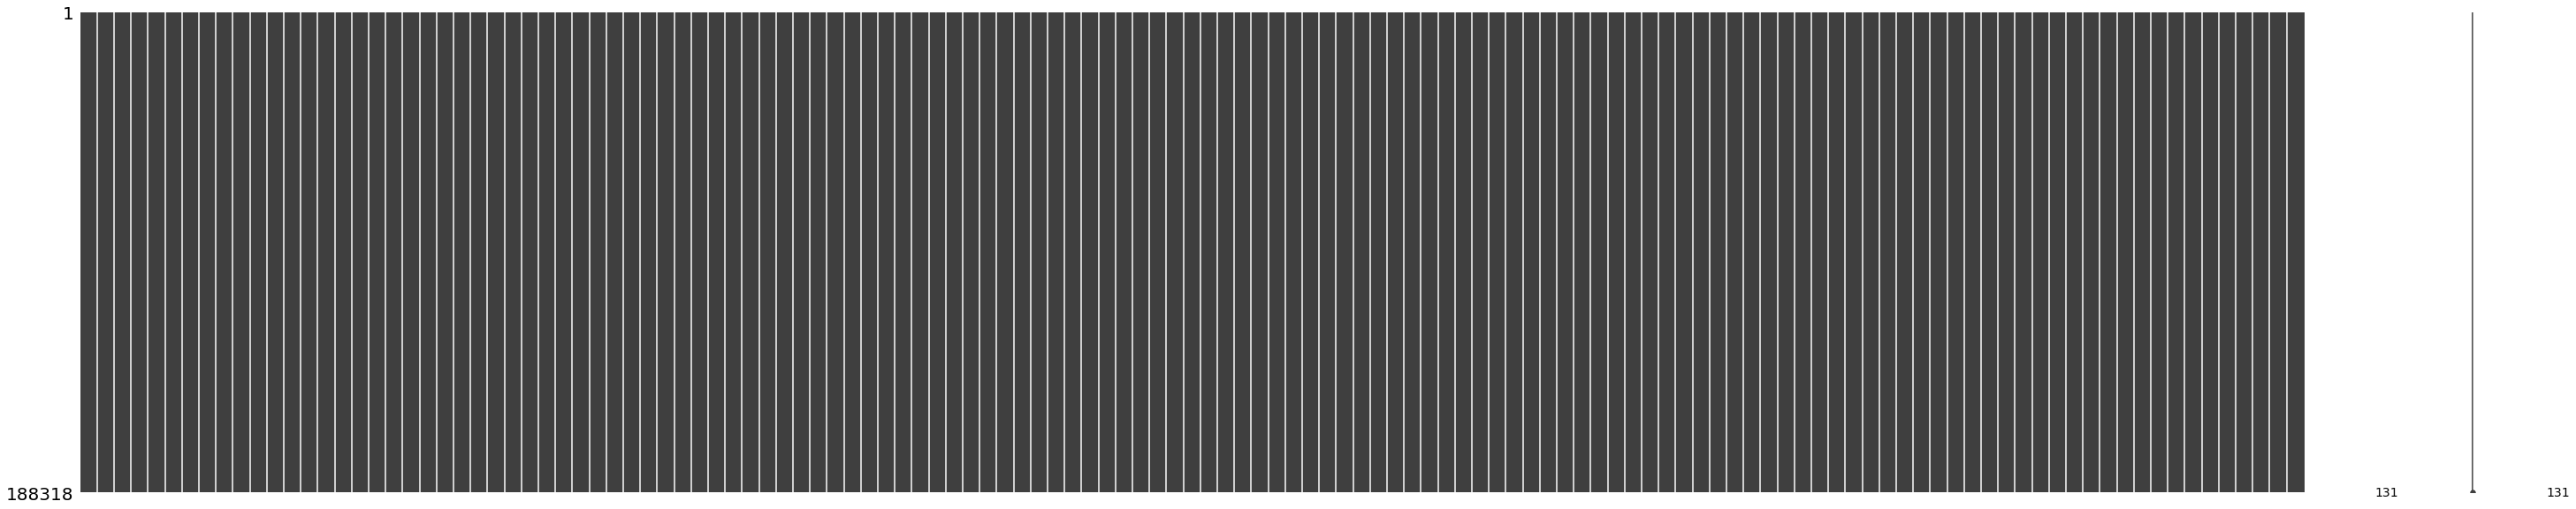

In [71]:
missingno.matrix(train,figsize=(50,10))

In [72]:
train.isnull().sum()

cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cat19     0
cat20     0
cat21     0
cat22     0
cat23     0
cat24     0
cat25     0
cat26     0
cat27     0
cat28     0
cat29     0
cat30     0
         ..
cat102    0
cat103    0
cat104    0
cat105    0
cat106    0
cat107    0
cat108    0
cat109    0
cat110    0
cat111    0
cat112    0
cat113    0
cat114    0
cat115    0
cat116    0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 131, dtype: int64

In [73]:
print(train.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [74]:
train.duplicated(subset=None,keep='first').sum()

0

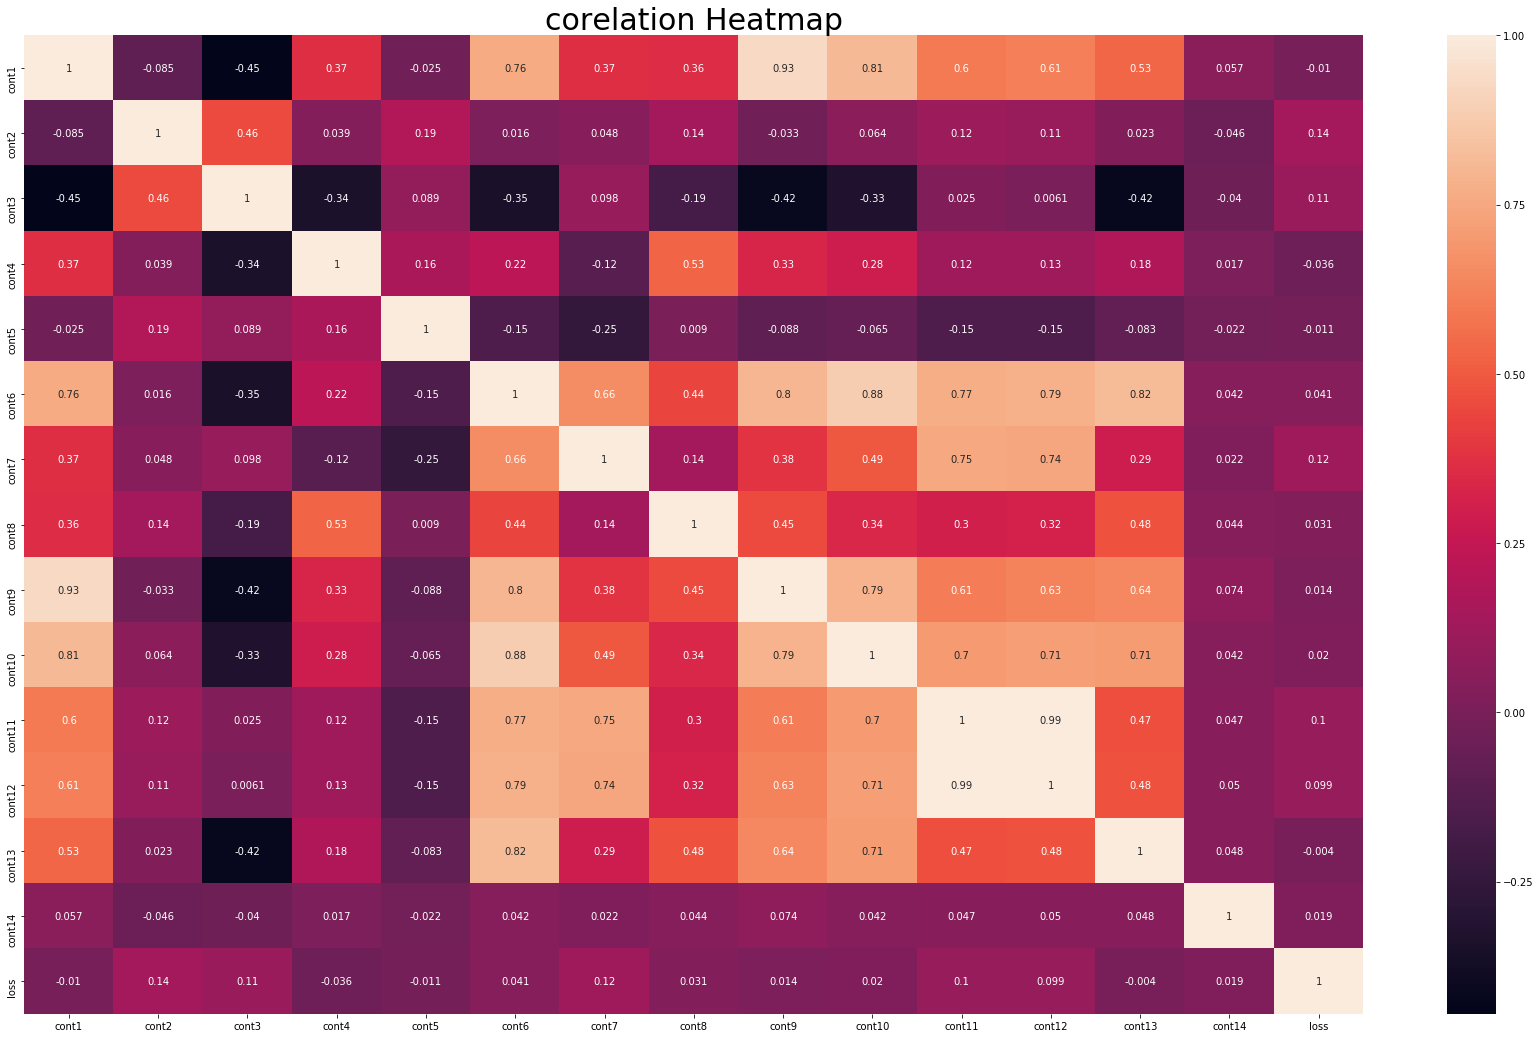

In [75]:
train_cor=train.corr()
plt.figure(figsize=(30,18))
sns.heatmap(data=train_cor,annot=True)
plt.title('corelation Heatmap',fontsize=30)
plt.show()

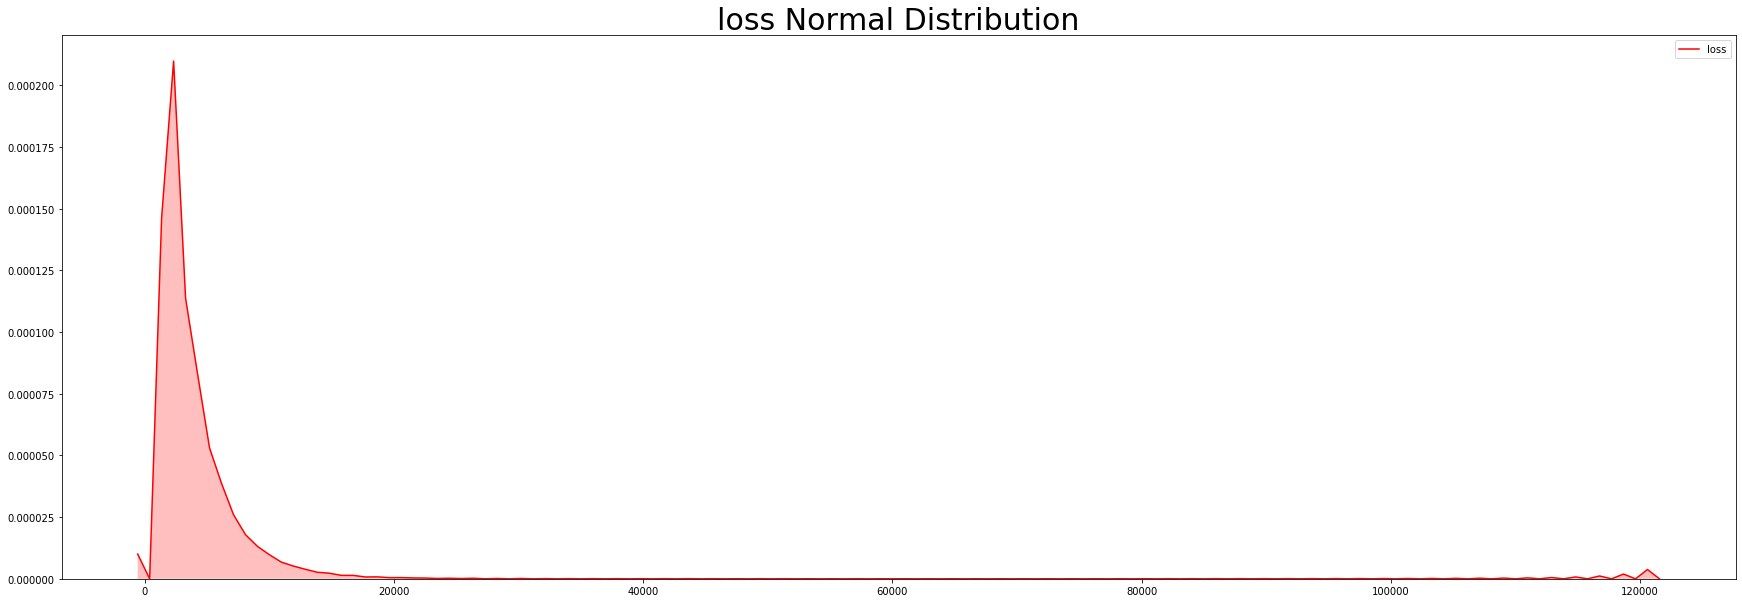

In [76]:
#loss Normal Distribution
plt.figure(figsize= (30,10))
sns.kdeplot(data=train['loss'], shade=True, color= 'red')
plt.title('loss Normal Distribution', fontsize=30)
plt.legend()
plt.show()

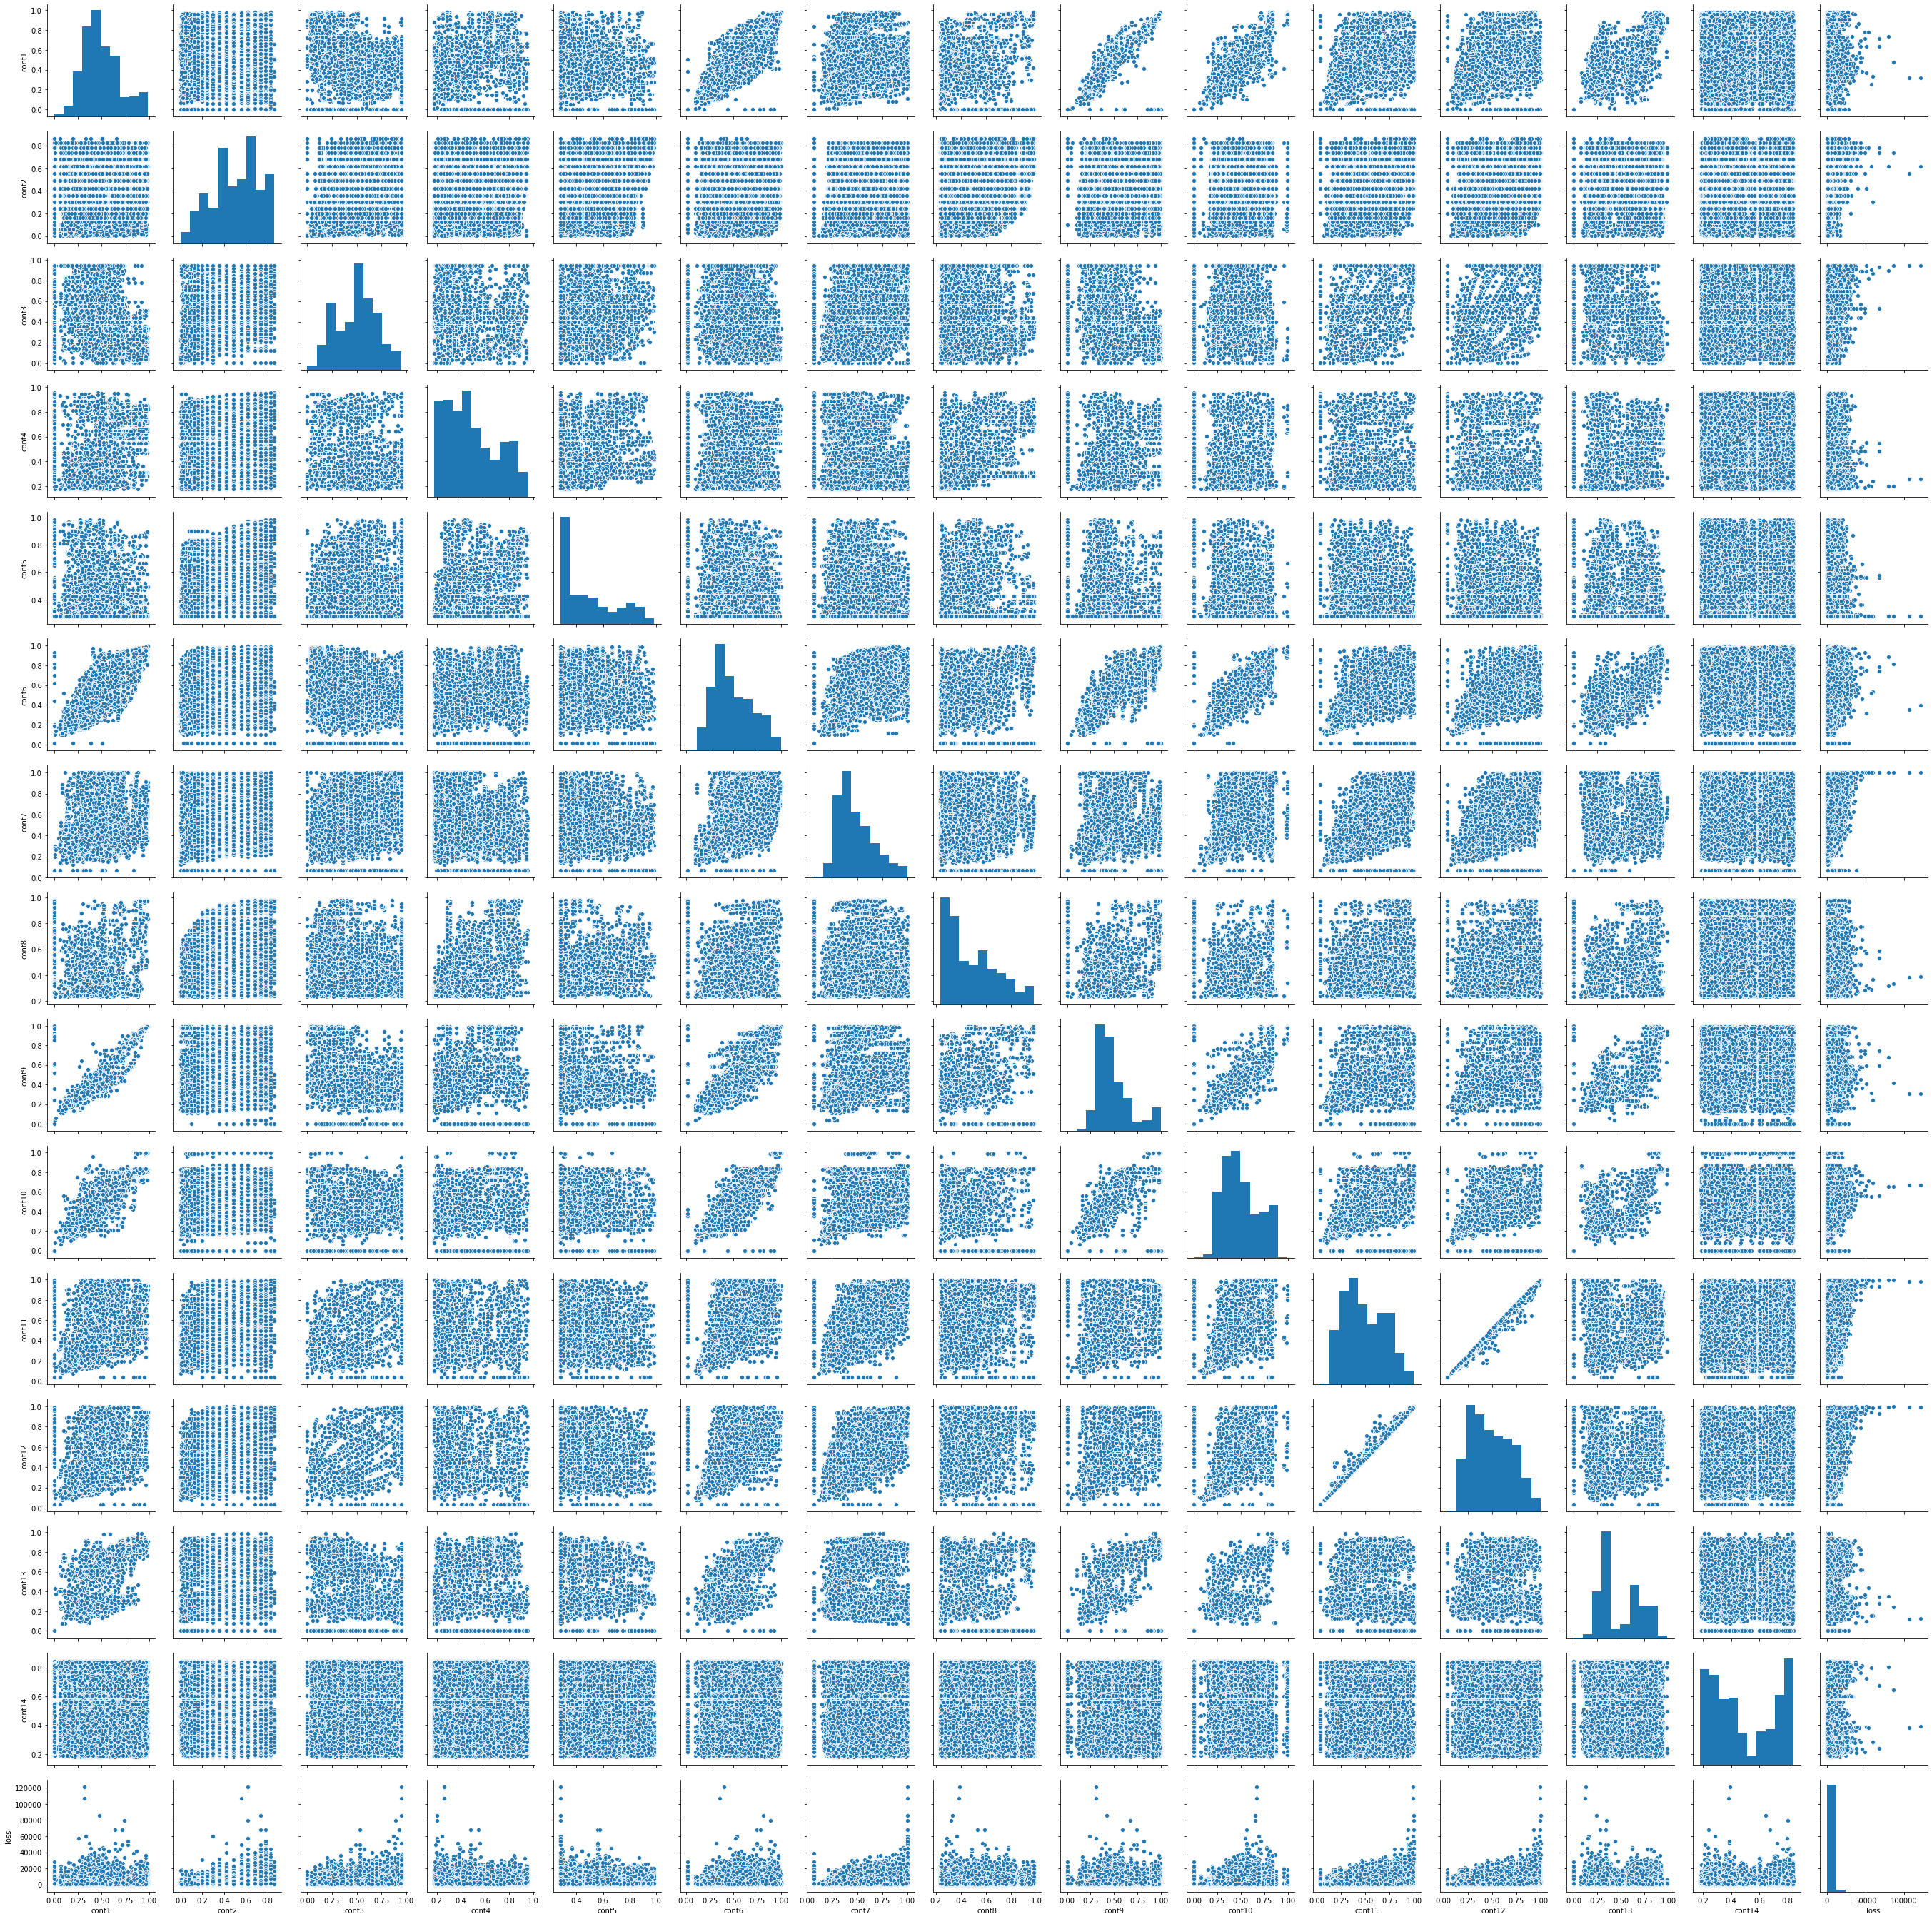

In [77]:
sns.pairplot(train)

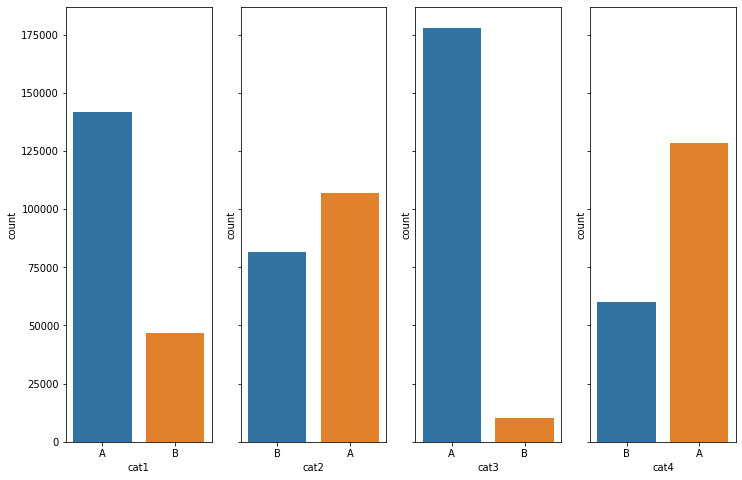

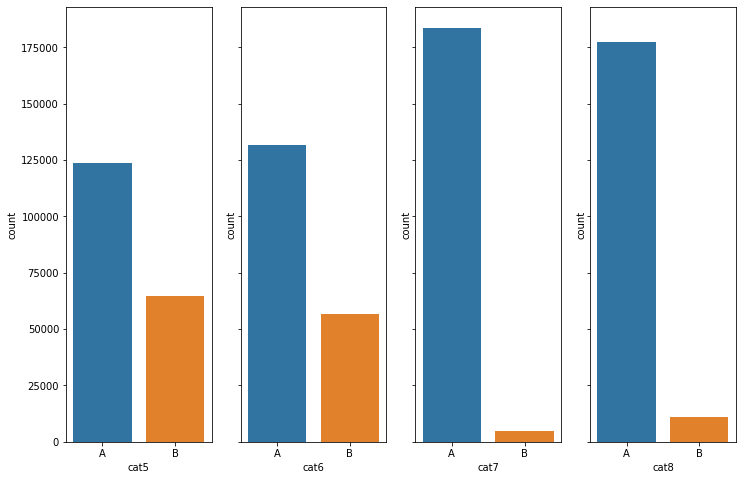

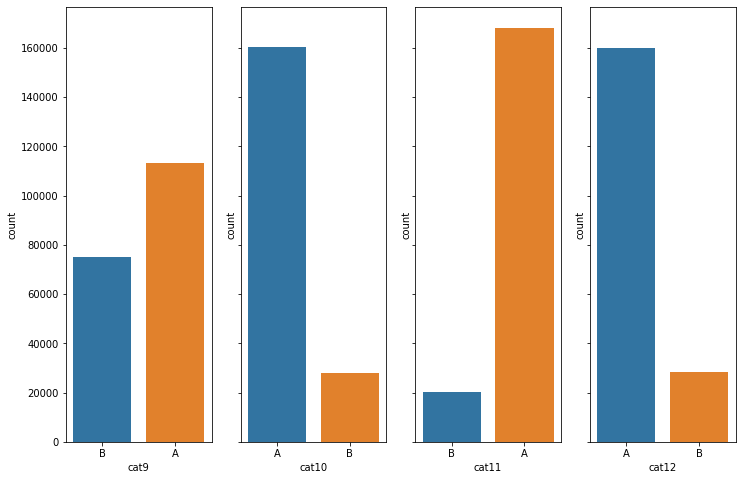

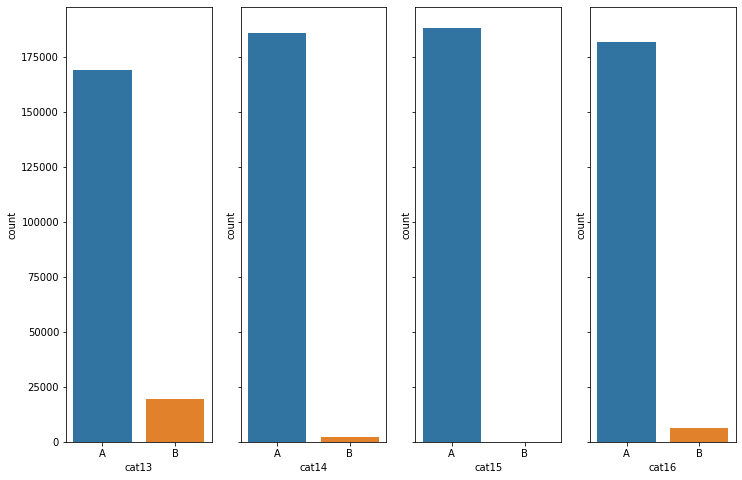

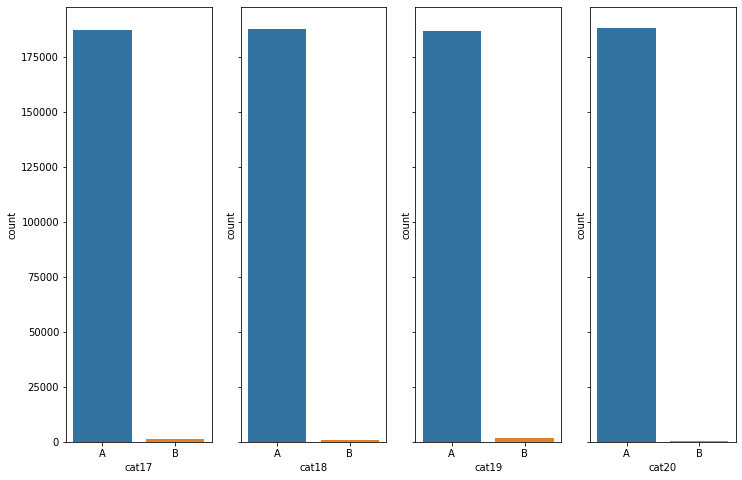

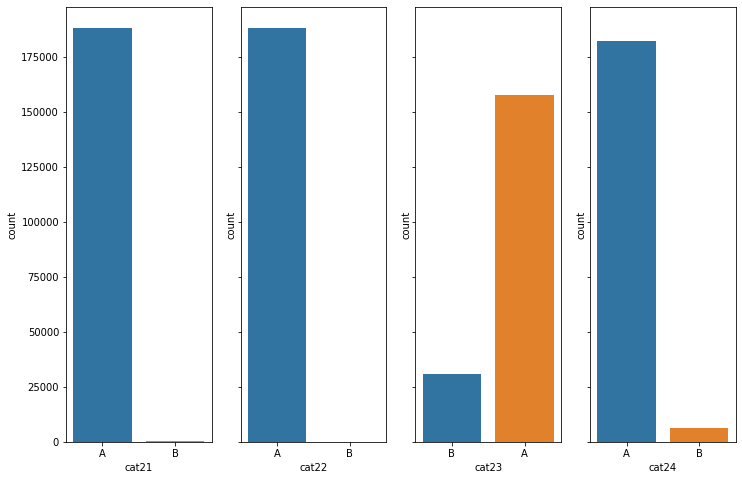

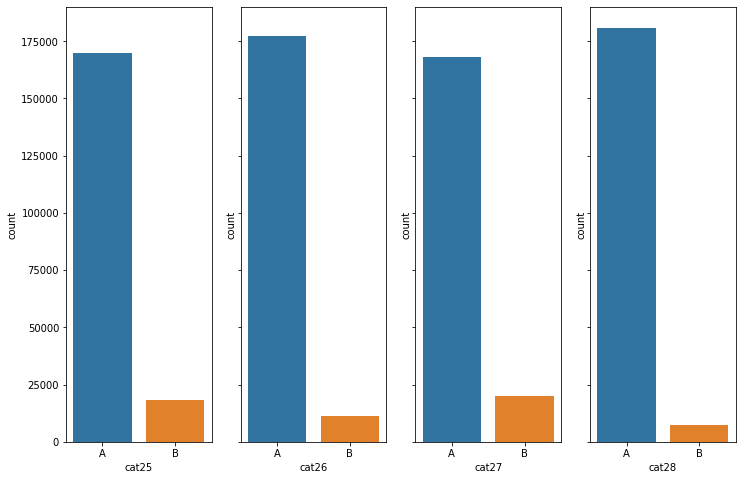

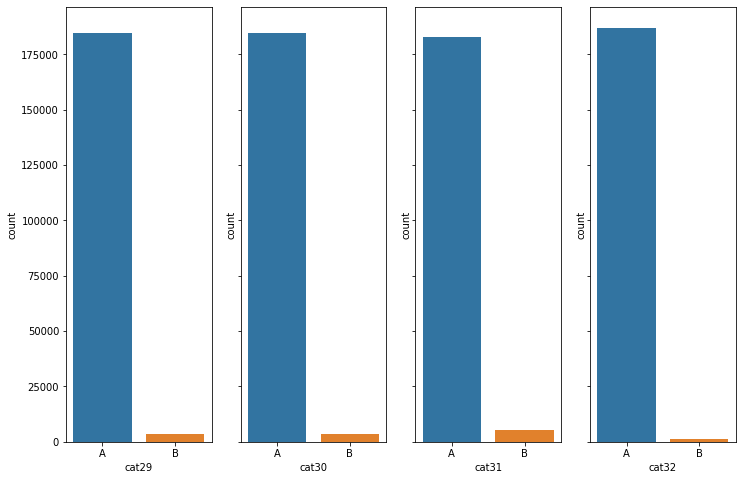

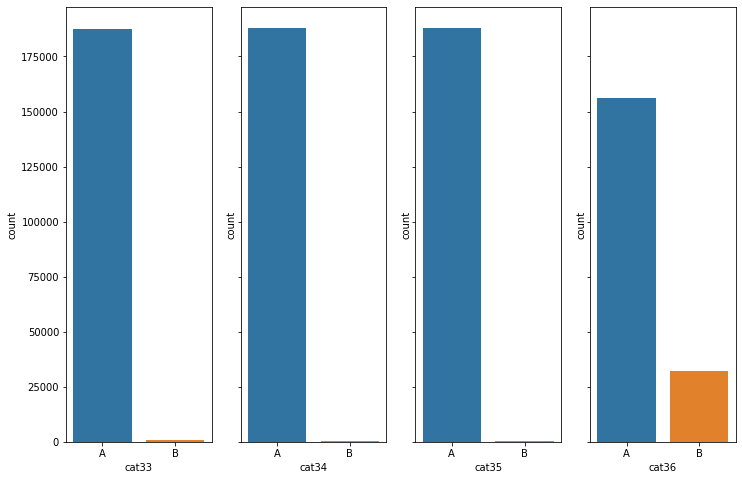

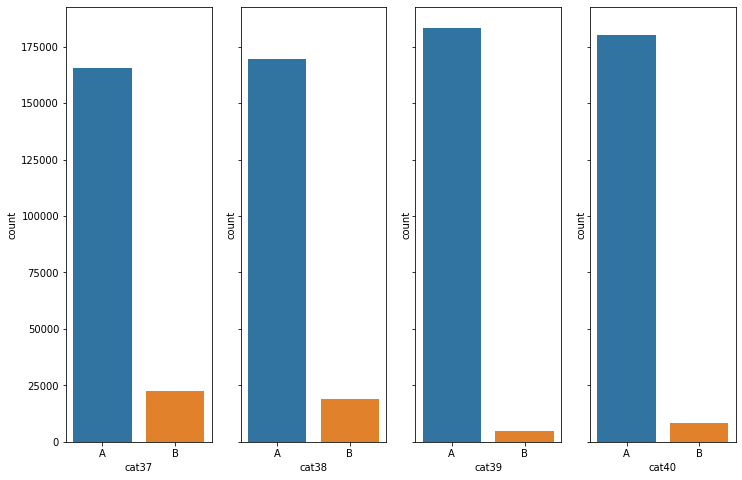

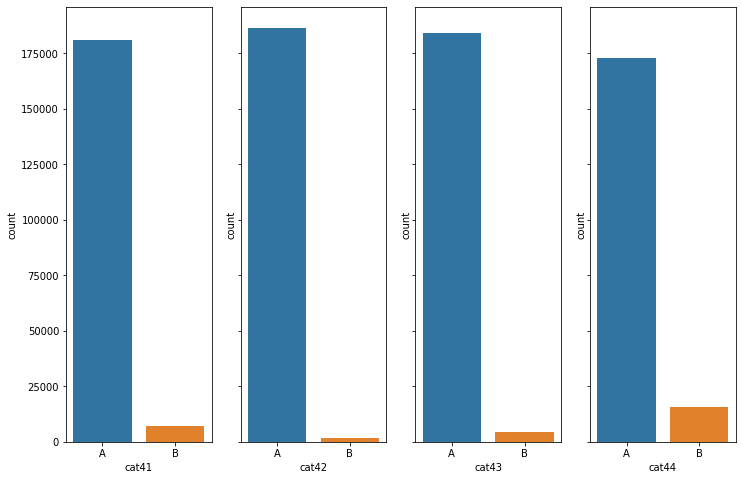

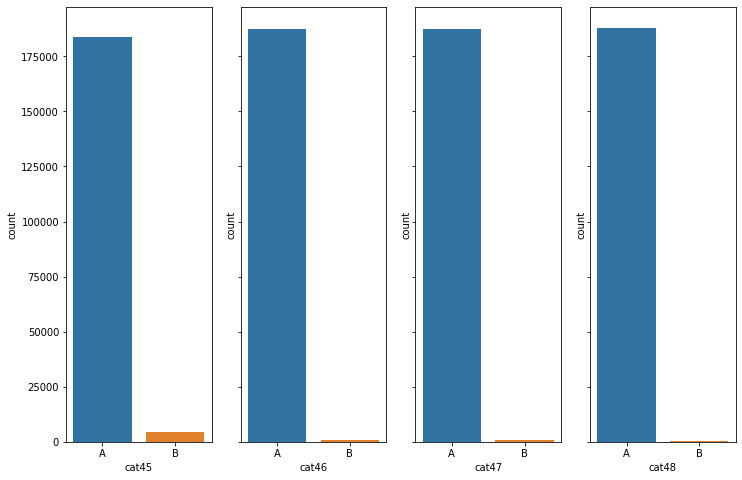

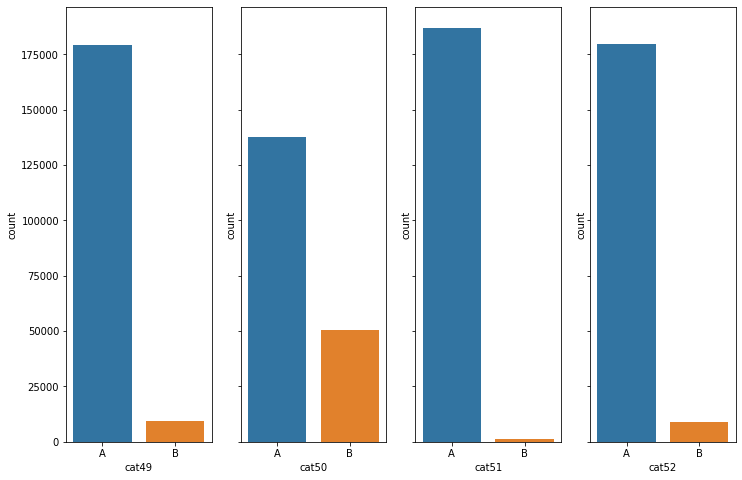

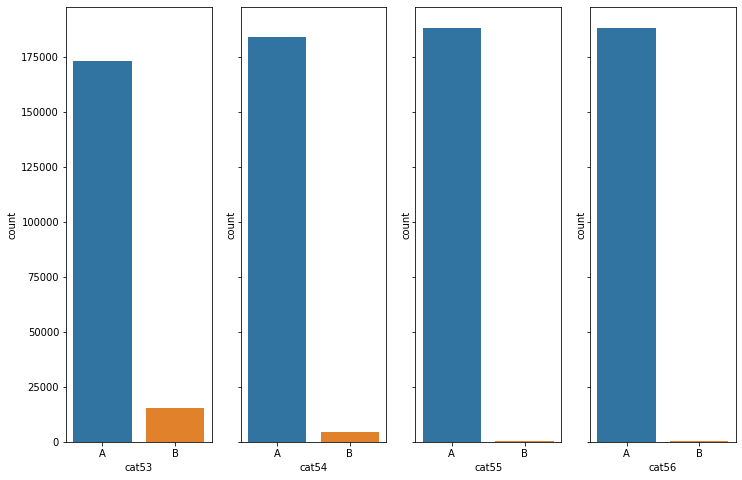

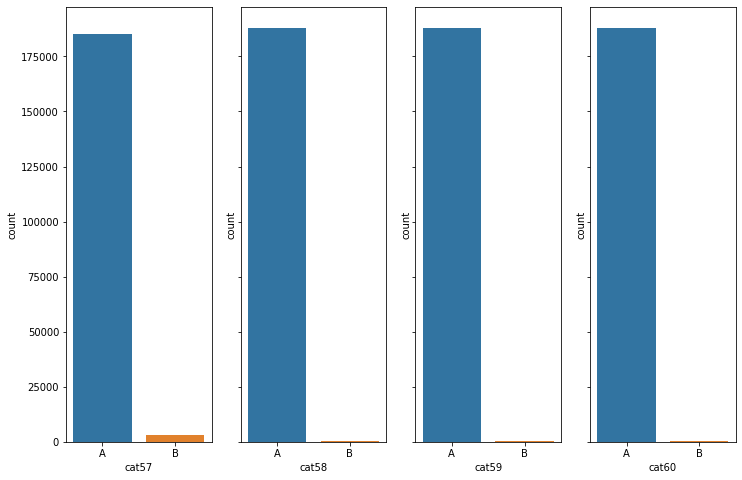

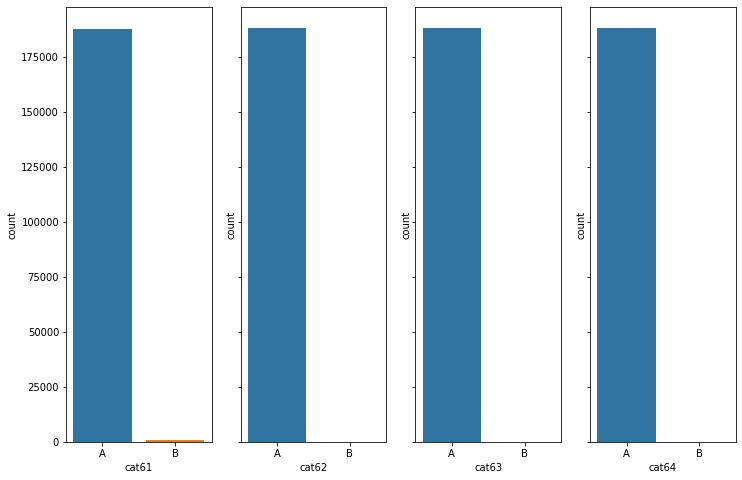

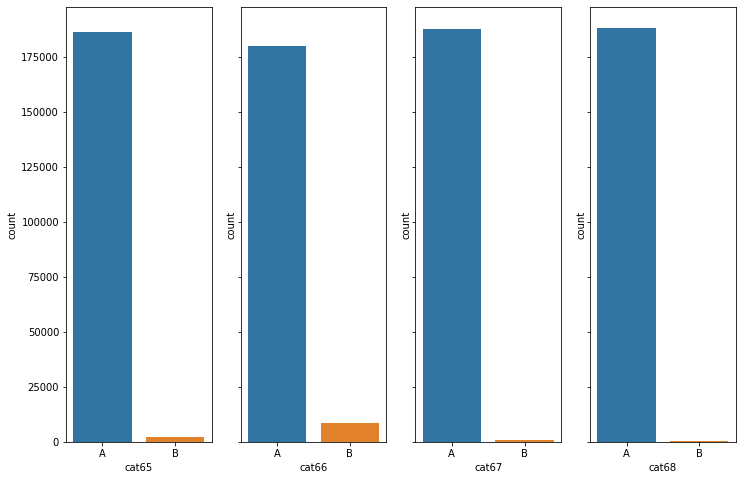

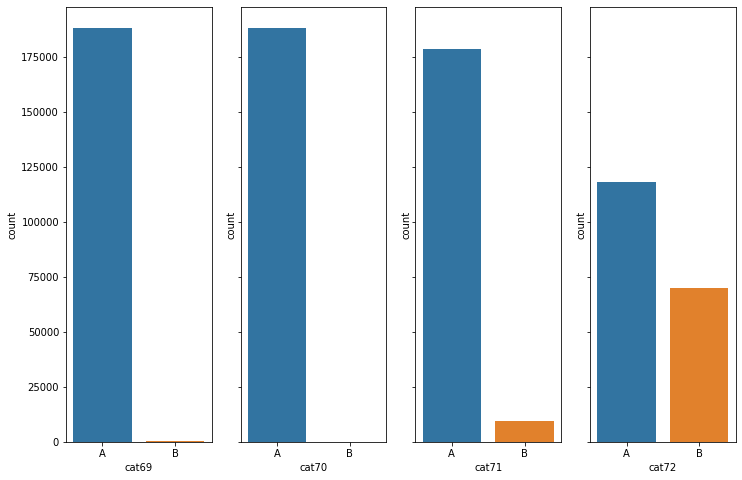

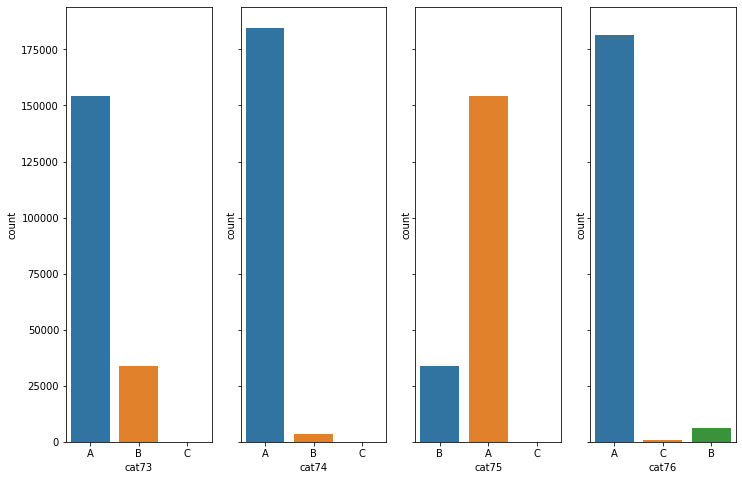

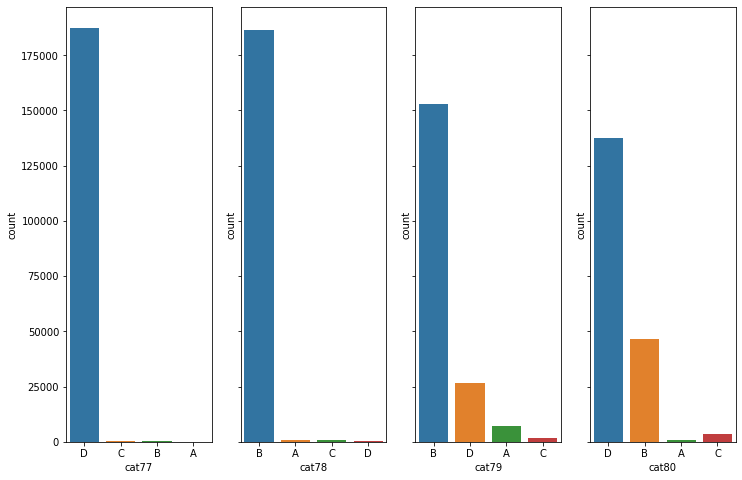

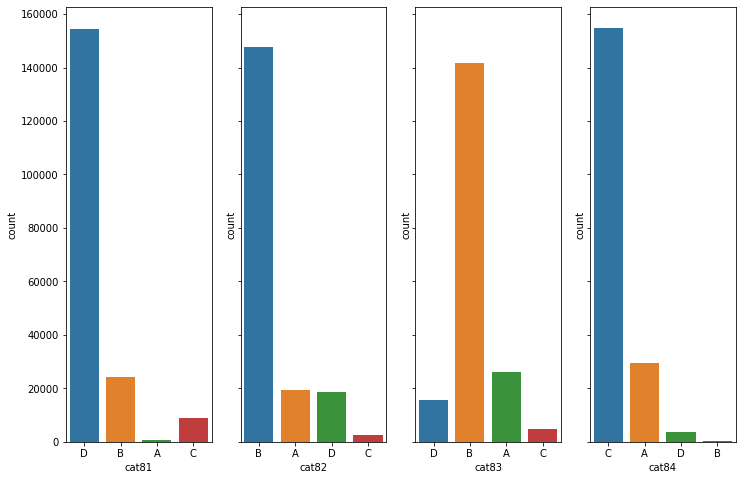

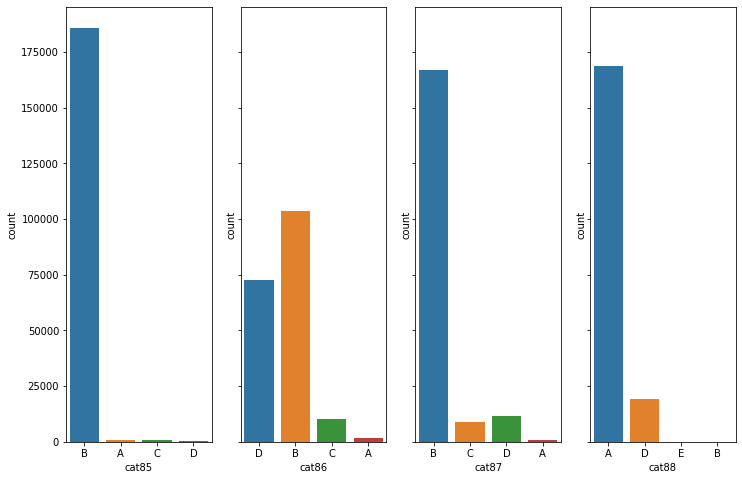

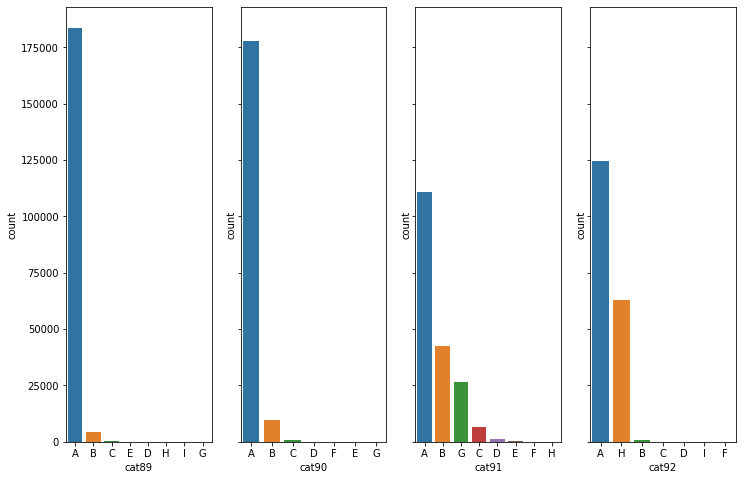

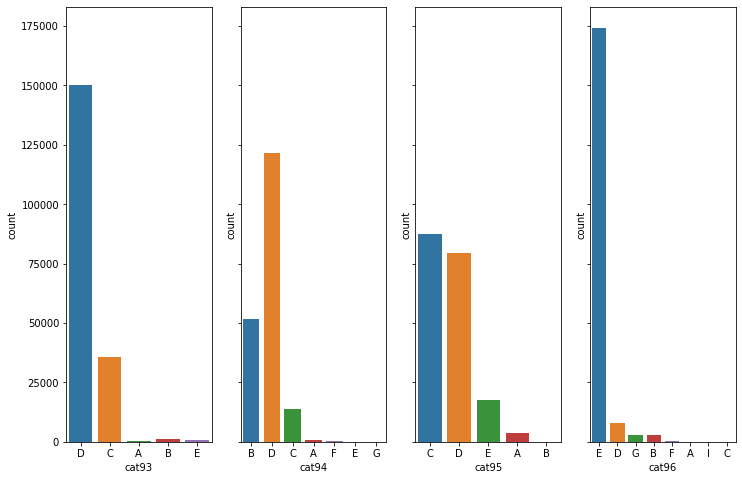

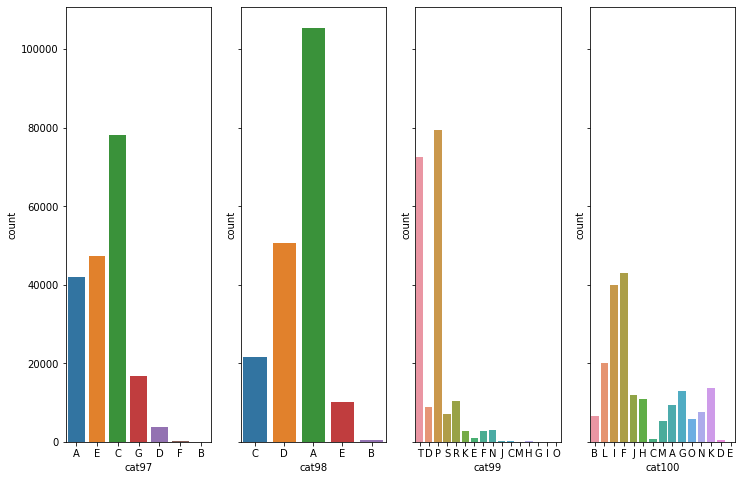

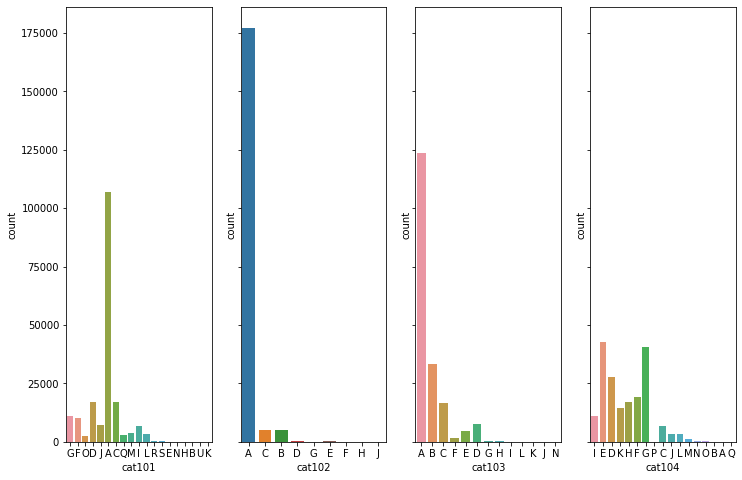

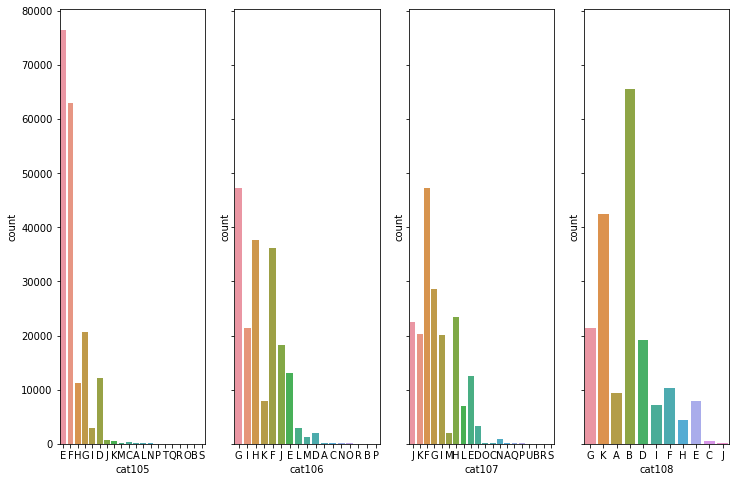

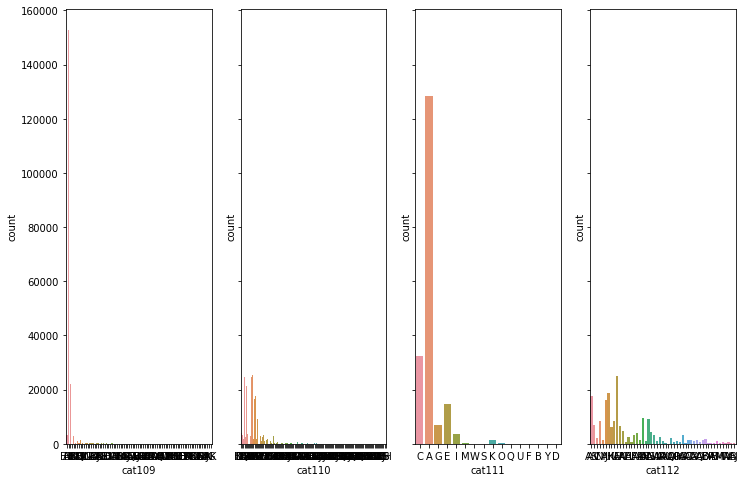

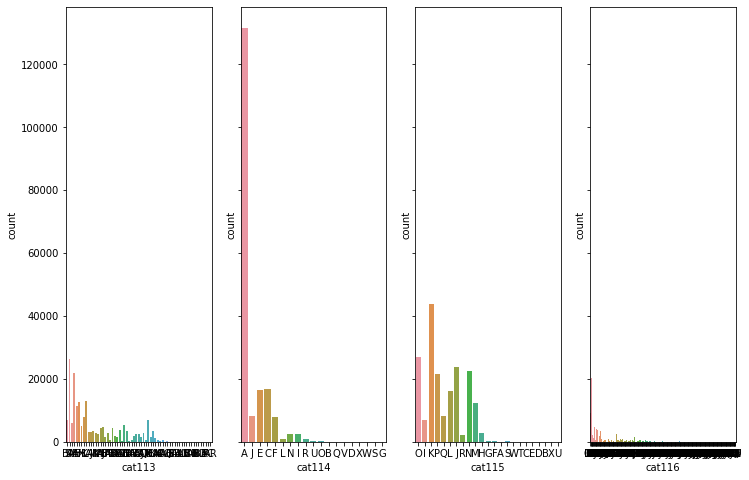

In [78]:
# Count of each label in each category

#names of all the columns
cols = train.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train, ax=ax[j])

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

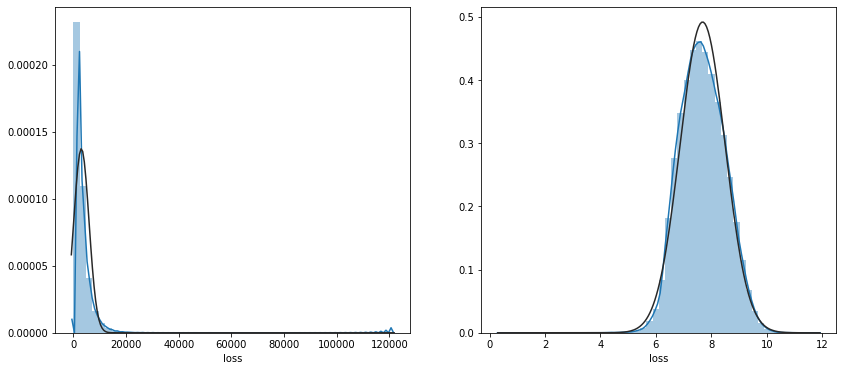

In [79]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(train['loss'], fit=norm, ax=ax1)
sns.distplot(np.log(train['loss']+1), fit=norm, ax=ax2)

In [80]:
train=train.drop(train.loc[train['loss']>40000].index)

In [81]:
train['loss']=np.log(train['loss']+1)
Ytrain=train['loss']

In [82]:
data=train
train=train[list(test)]
all_data=pd.concat((train, test))
all_data.shape

(313841, 130)

In [83]:
#Data preprocessing
cat_features=list(np.where(all_data.dtypes==np.object)[0])
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]


In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
non_numeric=list(all_data.select_dtypes(np.object))
for cols in non_numeric:
    le.fit(all_data[cols])
    all_data[cols]=le.transform(all_data[cols])

In [85]:
print(train.shape, test.shape)
Xtrain=all_data[:len(train)]
Xtest=all_data[len(train):]
print(Xtrain.shape, Ytrain.shape, Xtest.shape, submission.shape)

(188295, 130) (125546, 130)
(188295, 130) (188295,) (125546, 130) (125546, 1)


In [88]:
#building model
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#import optuna
from sklearn.model_selection import cross_val_score


# XGBoost

In [89]:
model_xgb=XGBRegressor(tree_method='gpu_hist', seed=18, objective='reg:linear', n_jobs=-1, verbosity=0,
                       colsample_bylevel=0.764115402027029, colsample_bynode=0.29243734009596956, 
                       colsample_bytree= 0.7095719673041723, gamma= 4.127534050725986, learning_rate= 0.02387231810322894, 
                       max_depth=14, min_child_weight=135, n_estimators=828,reg_alpha=0.3170105723222332, 
                       reg_lambda= 0.3660379465131937, subsample=0.611471430211575)
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.764115402027029,
             colsample_bynode=0.29243734009596956,
             colsample_bytree=0.7095719673041723, gamma=4.127534050725986,
             importance_type='gain', learning_rate=0.02387231810322894,
             max_delta_step=0, max_depth=14, min_child_weight=135, missing=None,
             n_estimators=828, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.3170105723222332,
             reg_lambda=0.3660379465131937, scale_pos_weight=1, seed=18,
             silent=None, subsample=0.611471430211575, tree_method='gpu_hist',
             verbosity=0)

# LightGBM

In [90]:
model_LGB=LGBMRegressor(objective='regression_l1', random_state=18, subsample_freq=1,
                        colsample_bytree=0.3261853512759363, min_child_samples=221, n_estimators=2151, num_leaves= 45, 
                        reg_alpha=0.9113713668943361, reg_lambda=0.8220990333713991, subsample=0.49969995651550947, 
                        max_bin=202, learning_rate=0.02959820893211799) #,device='gpu')
model_LGB

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.3261853512759363, importance_type='split',
              learning_rate=0.02959820893211799, max_bin=202, max_depth=-1,
              min_child_samples=221, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=2151, n_jobs=-1, num_leaves=45,
              objective='regression_l1', random_state=18,
              reg_alpha=0.9113713668943361, reg_lambda=0.8220990333713991,
              silent=True, subsample=0.49969995651550947,
              subsample_for_bin=200000, subsample_freq=1)

# CatBoost

In [91]:
model_Cat=CatBoostRegressor(loss_function='MAE', random_seed=18, task_type='GPU', cat_features=cat_features, verbose=False,
                            iterations=2681, learning_rate=0.2127106032536721, depth=7, l2_leaf_reg=5.266150673910493, 
                            random_strength=7.3001140226199315, bagging_temperature=0.26098669708900213)
model_Cat

# Final Fitting  & Prediction

In [96]:
model_Cat.fit(Xtrain, Ytrain)
model_LGB.fit(Xtrain, Ytrain)
model_xgb.fit(Xtrain, Ytrain)
lgb_predictions=model_LGB.predict(Xtest)
cat_predictions=model_Cat.predict(Xtest)
xgb_predictions=model_xgb.predict(Xtest)


CatBoostError: c:/goagent/pipelines/buildmaster/catboost.git/catboost/cuda/cuda_lib/cuda_manager.cpp:201: Condition violated: `State == nullptr'

In [97]:
predictions=(lgb_predictions + cat_predictions + xgb_predictions)/3

predictions=np.exp(predictions)-1
submission['loss']=predictions
submission.to_csv('Result.csv')
submission.head()

NameError: name 'lgb_predictions' is not defined